# IT41 Practical Session 2  - Time complexity of algorithms

---



In this practical session we will illustrate the concept of time complexity and running time of algorithms that we discussed in class or in rectitation.

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/bigO.jpeg'  width="440px" />    
    </tr>
</table>

Recall that the time complexity of an algorithm is a measure of the number of elementary operations done during the execution of the algorithm. By considering the asymptotic behavior of the running time one obtains a tool to define classes of algorithms in terms of their (asymptotic) efficiency.

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/classes.png'  width="440px" />    
    </tr>
</table>



---

## Time Complexity
Let's illustrate the different classes of complexity class trough some examples of algorithms. We will measure the time execution of several algorithms by using the following code

```Python
import time
main()
print("---%s seconds ---" % (time.time() - start_time))
```

### Constant complexity
An algorithm with class of complexity $\Theta(1)$ has a running time that does not depend on the size of the input data.
```Python
import time
def print_first_element(T):
     start_time = time.time()
     print(T[0])
     print("--- %s seconds ---" % (time.time() - start_time))
    ```
The running time will be identical no matter what the size of $T$ is.
Try this code with different choices of array $T$.
   

In [1]:
import time
def print_first_element(T):
     start_time = time.time()
     print(T[0])
     print("--- %s seconds ---" % (time.time() - start_time))

A = [1,2,3,4]
B = list(range(25,100))

print_first_element(A)
print_first_element(B)

1
--- 0.0 seconds ---
25
--- 0.0 seconds ---


To test and compare the following algorithms, you will need to produce random large arrays of integers.

The following two codes could be useful to generate those arrays.
```Python
def createRandomSortedList(num, start = 1, end = 100): 
    arr = [] 
    tmp = random.randint(start, end) 
      
    for x in range(num): 
          
        while tmp in arr: 
            tmp = random.randint(start, end) 
              
        arr.append(tmp) 
          
    arr.sort() 
      
    return arr 
```
```Python
def createRandomUnSortedList(num, start = 1, end = 100): 
    arr = [] 
    tmp = random.randint(start, end) 
      
    for x in range(num): 
          
        while tmp in arr: 
            tmp = random.randint(start, end) 
              
        arr.append(tmp) 
      
    return arr 
```


In [2]:
import random

def createRandomSortedList(num, start = 1, end = 100): 
    arr = [] 
    tmp = random.randint(start, end) 
      
    for x in range(num): 
          
        while tmp in arr: 
            tmp = random.randint(start, end) 
              
        arr.append(tmp) 
          
    arr.sort() 
      
    return arr 

def createRandomUnSortedList(num, start = 1, end = 100): 
    arr = [] 
    tmp = random.randint(start, end) 
      
    for x in range(num): 
          
        while tmp in arr: 
            tmp = random.randint(start, end) 
              
        arr.append(tmp) 
      
    return arr 


### Logarithmic complexity

An algorithm which has a complexity in $\Theta(\ln(n))$ does not explore the full size of the input data to solve the problem. Typically the $\ln(n)$ term indicates that the size of the input date is  probably reduced all along the algorithm (like in the Bisection algorithm in Practical Session 1).
Let us consider the following binary search algorithm.

```Python
def binary_search(data, value):
    n = len(data)
    left = 0
    right = n - 1
    while left <= right:
        middle = (left + right) // 2
        if value < data[middle]:
            right = middle - 1
        elif value > data[middle]:
            left = middle + 1
        else:
            return middle
```
Check that this algorithm is solving the problem: find 'value' in a sorted array 'data'.

Write an other algoritm which looks for 'value' in 'data' by accessing linearly all values of 'data'. What is the complexity of this second algorithm ?

Compare the excecution time of both algorithms on a selection of sorted array of increasing size. 

In [3]:
def binary_search(data, value):
    n = len(data)
    left = 0
    right = n - 1
    while left <= right:
        middle = (left + right) // 2
        if value < data[middle]:
            right = middle - 1
        elif value > data[middle]:
            left = middle + 1
        else:
            return middle

def binary_search_linear(data,value):
    for k in range (len(data)):
        if (k == value):
            return k

A = list(range(0,100))

print(binary_search(A,58))
print(binary_search_linear(A,58))

58
58


In [4]:

Z = list(range(1,20000000))

In [5]:

random_index = random.randint(0,len(Z)-1)
print(random_index)
start_time = time.time()
binary_search(Z, Z[random_index])
final = time.time()-start_time
final

895487


0.0

In [6]:
s= 100000
n = s+15000

log_time = []
for k in range(s,n):
    #A = createRandomSortedList(k)
    B = list(range(1,k))
    random_index = random.randint(0,len(B)-1)
    start_time = time.time()
    binary_search(B, B[random_index])
    final = time.time()-start_time
    log_time.append(final)

max(log_time)


0.00397038459777832

In [7]:

lin_time = []
for k in range(s,n):
    #A = createRandomSortedList(k)
    B = list(range(1,k))
    random_index = random.randint(0,len(B)-1)
    start_time = time.time()
    binary_search_linear(B, B[random_index])
    final = time.time()-start_time
    lin_time.append(final)

max(log_time)

0.00397038459777832

In [8]:
print("Log complexity max time :",max(log_time))
print("Linear complexity max time :",max(lin_time))

Log complexity max time : 0.00397038459777832
Linear complexity max time : 0.025181293487548828


15000
x : 15000


Text(0, 0.5, 'Execution time in sec')

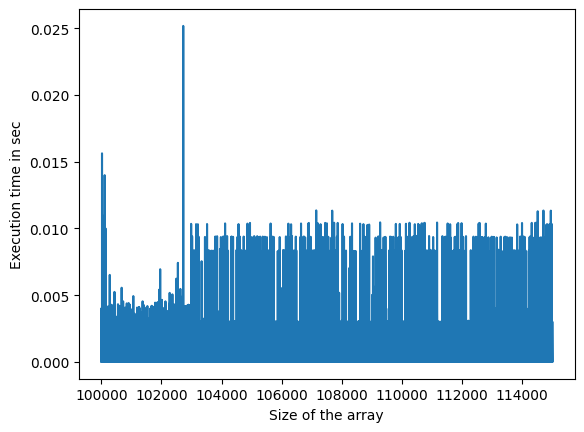

In [9]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(s,n,15000)
print(len(log_time))
print("x :",len(x))


plt.plot(x, lin_time)

plt.xlabel('Size of the array')
plt.ylabel('Execution time in sec')

Text(0, 0.5, 'Execution time in sec')

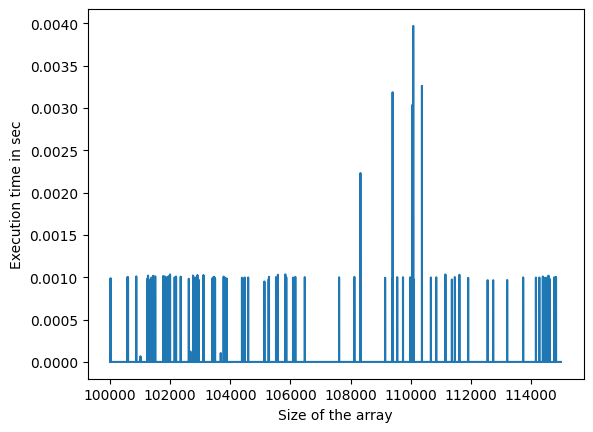

In [10]:
plt.plot(x,log_time)
plt.xlabel('Size of the array')
plt.ylabel('Execution time in sec')

### Linear complexity

Algorithms with a linear complexity are the best ones when the solution of your problem requires to examine all the values of your input data. This is the case of the linear seach of the previous question when you applied it to an unsorted array. 

### Quasilinear complexity

Implement Merge sort algortihm and test its running time for random arrays of increasing size

In [11]:
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left_half = arr[:mid]
    right_half = arr[mid:]

    left_half = merge_sort(left_half)
    right_half = merge_sort(right_half)

    return merge(left_half, right_half)

def merge(left_half, right_half):
    result = []
    i = j = 0
    while i < len(left_half) and j < len(right_half):
        if left_half[i] < right_half[j]:
            result.append(left_half[i])
            i += 1
        else:
            result.append(right_half[j])
            j += 1

    result += left_half[i:]
    result += right_half[j:]

    return result

In [12]:
def random_list(n, a, b):
    return [random.randint(a, b) for _ in range(n)]


In [13]:
my_list = random_list(15,1,100)
print(merge_sort(my_list))

[14, 18, 18, 27, 27, 59, 64, 67, 69, 74, 77, 86, 87, 94, 95]


Text(0, 0.5, 'Execution time in sec')

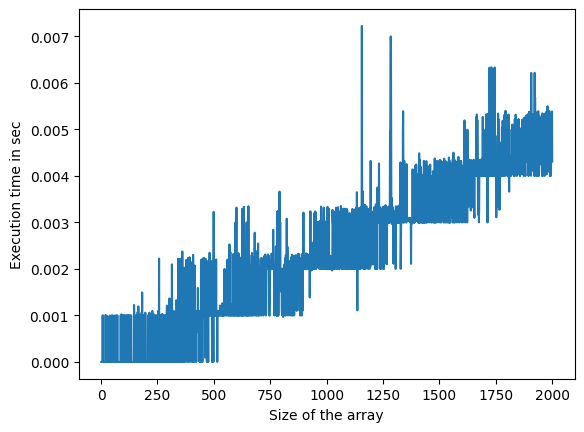

In [14]:
merge_time = []
s = 1
n = s + 2000

for k in range(s,n):
    A = random_list(k,1,10000)


    start_time = time.time()
    merge_sort(A)
    final = time.time()-start_time
    merge_time.append(final)



x = list(range(s,n))

plt.plot(x,merge_time)
plt.xlabel('Size of the array')
plt.ylabel('Execution time in sec')

### Polynomial complexity

Implement the section sort algorithm as seen in class and test its running time for random arrays of increasing size. For which size of arrays is Merge sort more efficient that Section sort ? 


In [15]:
def section_sort(A):
    
    for i in range(0,len(A)):
        min = i
        for j in range(i+1,len(A)):
            if A[j] < A[min]:
                min = j
        tmp = A[i]
        A[i] = A[min]
        A[min] = tmp
    return A


In [16]:
my_list = random_list(15,1,100)
print(section_sort(my_list))

[21, 30, 32, 32, 40, 58, 63, 74, 74, 83, 84, 89, 92, 96, 98]


Text(0, 0.5, 'Execution time in sec')

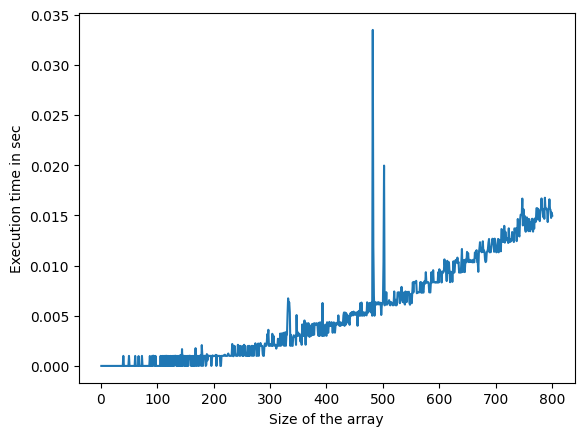

In [17]:
section_time = []
s = 1
n = s + 800

for k in range(s,n):
    A = random_list(k,1,10000)


    start_time = time.time()
    section_sort(A)
    final = time.time()-start_time
    section_time.append(final)



x = list(range(s,n))

plt.plot(x,section_time)
plt.xlabel('Size of the array')
plt.ylabel('Execution time in sec')

### Exponential complexity

Implement the recursive version of the Fibonacci sequence. Determine its complexity and test its running time for some increasing value of $n$.

In [18]:
X = 0
def fibonacci(n):
    
    if n == 0:
        return 0
    elif n == 1 :
        return 1
    else :
        return fibonacci(n-1) + fibonacci(n-2)
    




Text(0, 0.5, 'Execution time in sec')

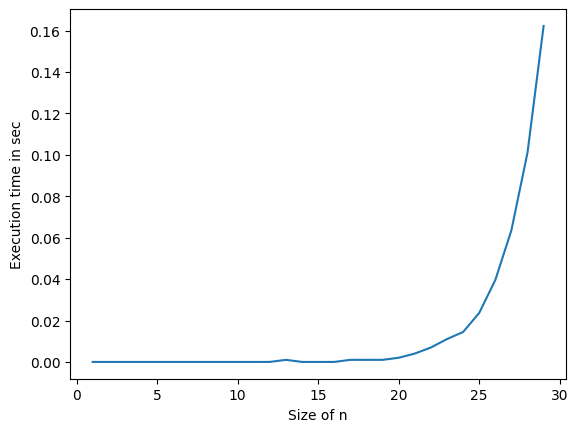

In [19]:
fib_time = []



for k in range(1,30):
    start_time = time.time()
    fibonacci(k)
    final = time.time()-start_time
    fib_time.append(final)



x_f = list(range(1,30))

plt.plot(x_f,fib_time)
plt.xlabel('Size of n')
plt.ylabel('Execution time in sec')

Exponential complexity


### Factorial complexity

Consider the following code:

```Python

def heap_permutation(data, n):
    if n == 1:
        print(data)
        return
    
    for i in range(n):
        heap_permutation(data, n - 1)
        if n % 2 == 0:
            data[i], data[n-1] = data[n-1], data[i]
        else:
            data[0], data[n-1] = data[n-1], data[0]
            ```
            
What is this code doing ? Evaluate its complexity.            

This function list all the possible permutation of a list 'data'
The Heap permutation has a complexity of n!

In [20]:
def heap_permutation(data, n):
    if n == 1:
        print(data)
        return
    
    for i in range(n):
        heap_permutation(data, n - 1)
        if n % 2 == 0:
            data[i], data[n-1] = data[n-1], data[i]
        else:
            data[0], data[n-1] = data[n-1], data[0]


A = list(range(3))
heap_permutation(A,len(A))   

[0, 1, 2]
[1, 0, 2]
[2, 0, 1]
[0, 2, 1]
[1, 2, 0]
[2, 1, 0]


In [21]:
10*9*8*7*6*5*4*3*2

3628800

## Exercises

### Exercise 1

Program and compare the running time of the fast powering algorithm and the naive power algorithm (see Recitation 2)

In [22]:
def naive_power_i(x,n):
    r = 1
    for k in range(n):
        r = r*x
    return r

def naive_power(x,n):
    if n == 0:
        return 1
    else:
        return naive_power(x,n-1) * x

def fast_power(a,n):
    r=1
    while n > 0 :
        if n%2 == 0:
            a = a*a
            n = n //2
        else :
            r = r*a
            n = n -1

    return r

print(naive_power_i(2,4))  
print(fast_power(2,4))

16
16


Max time for naive : 0.401958703994751
Max time for fast : 0.001054525375366211
Difference : 0.40090417861938477
Percentage : 99.73765330495742 %


Text(0, 0.5, 'Execution time in sec')

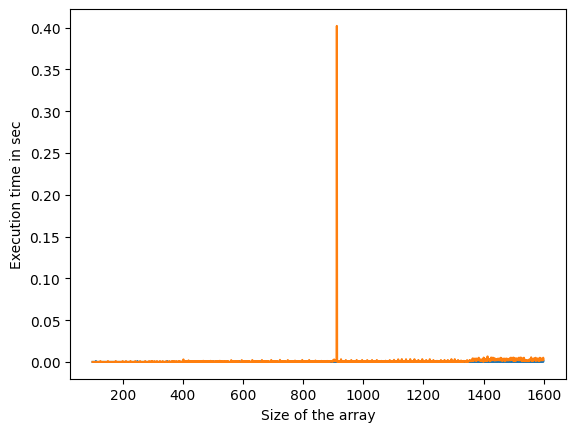

In [23]:
import time
import matplotlib.pyplot as plt

fast_time = []
naive_time =[]
s = 100
n = s + 1500

for k in range(s,n):

    start_time = time.time()
    naive_power(10000,k)
    final = time.time()-start_time
    naive_time.append(final)



for k in range(s,n):

    start_time = time.time()
    fast_power(10000,k)
    final = time.time()-start_time
    fast_time.append(final)


print("Max time for naive :",max(naive_time))
print("Max time for fast :",max(fast_time))
print("Difference :",max(naive_time)-max(fast_time))
print("Percentage :",100-(max(fast_time)/max(naive_time))*100,"%")


x = list(range(s,n))

plt.plot(x,fast_time)

plt.plot(x,naive_time)
plt.xlabel('Size of the array')
plt.ylabel('Execution time in sec')

### Exercise 2

Implement Quick sort algorithm (see https://www.khanacademy.org/computing/computer-science/algorithms/quick-sort/a/analysis-of-quicksort) and compare its running time with Merge sort on different examples of random arrays

In [28]:
def partition(list,g,d):
    pivot=list[g]
    i=g+1
    j=d
    while i<=j:
        while i<len(list) and list[i]<=pivot:
            i=i+1
        while list[j]>pivot:
            j=j-1
        if i<j:
            list[i],list[j]=list[j],list[i]
            i=i+1
            j=j-1
    list[g],list[j]=list[j],list[g]
    return j

def quick_sort(list,g,d):
    if g<d:
        j=partition(list,g,d)
        quick_sort(list,g,j-1)
        quick_sort(list,j+1,d)
    return list


In [29]:
A = [4,5,6,2,1,3]
print(quick_sort(A,0,5))

[1, 2, 3, 4, 5, 6]


### Exercise 3

Implement a function that compute the product of two $n\times n$ matrices using the naive algorithm introduced in linear algebra class. Then implement Strassen algorithm as given in Recitation 2. Generate some random $n\times n$ matrices and find out for which value of $n$, Strassen algorithm is better that the naive algorithm.

In [31]:
def matrix_product(m1,m2):
    m = []
    if len(m1[0]) != len(m2):
        print("Product not possible")
        return False
    for i in range(len(m1)):
        line = []
        for j in range(len(m2[0])):
            element = 0
            for k in range(len(m1[0])):
                element = element + m1[i][k] * m2[k][j]
            line.append(element)
        m.append(line)
    return m

In [32]:
m1 = [[0,0,0],[2,1,1],[2,1,1]]
m2 = [[3,2,1],[3,3,0],[0,1,2]]

print(matrix_product(m1,m2))

[[0, 0, 0], [9, 8, 4], [9, 8, 4]]


In [33]:
def strassen(A, B):
    n = len(A)

    # Cas de base
    if n == 1:
        return [[A[0][0] * B[0][0]]]

    # Diviser les matrices en sous-matrices de taille n/2
    mid = n // 2
    A11 = [A[i][:mid] for i in range(mid)]
    A12 = [A[i][mid:] for i in range(mid)]
    A21 = [A[i][:mid] for i in range(mid, n)]
    A22 = [A[i][mid:] for i in range(mid, n)]
    B11 = [B[i][:mid] for i in range(mid)]
    B12 = [B[i][mid:] for i in range(mid)]
    B21 = [B[i][:mid] for i in range(mid, n)]
    B22 = [B[i][mid:] for i in range(mid, n)]

    # Calcul des 7 produits de Strassen
    P1 = strassen(A11, sub(B12, B22))
    P2 = strassen(add(A11, A12), B22)
    P3 = strassen(add(A21, A22), B11)
    P4 = strassen(A22, sub(B21, B11))
    P5 = strassen(add(A11, A22), add(B11, B22))
    P6 = strassen(sub(A12, A22), add(B21, B22))
    P7 = strassen(sub(A11, A21), add(B11, B12))

    # Calcul des sous-matrices du résultat
    C11 = add(sub(add(P5, P4), P2), P6)
    C12 = add(P1, P2)
    C21 = add(P3, P4)
    C22 = add(sub(add(P5, P1), P3), P7)

    # Assembler les sous-matrices en une seule matrice
    C = [[0] * n for i in range(n)]
    for i in range(mid):
        for j in range(mid):
            C[i][j] = C11[i][j]
            C[i][j + mid] = C12[i][j]
            C[i + mid][j] = C21[i][j]
            C[i + mid][j + mid] = C22[i][j]

    return C

# Fonctions auxiliaires
def add(A, B):
    return [[A[i][j] + B[i][j] for j in range(len(A))] for i in range(len(A))]

def sub(A, B):
    return [[A[i][j] - B[i][j] for j in range(len(A))] for i in range(len(A))]

In [34]:
m1 = [[0,0,0],[2,1,1],[2,1,1]]
m2 = [[3,2,1],[3,3,0],[0,1,2]]

print(matrix_product(m1,m2))
print(strassen(m1,m2))

[[0, 0, 0], [9, 8, 4], [9, 8, 4]]


IndexError: list index out of range